<a href="https://colab.research.google.com/github/SentientRamen12/ml-fall-2024/blob/main/labs/CS_GY_6923_Lab_1_Shubham_Rastogi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1:  Simple linear regression for one independent variable

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the class demo on simple linear regression for an automobile dataset.  The lab use the Ames Housing dataset which is a commonly used machine learning data set for illustrating basic concepts.  

## Loading the data

The Ames housing data set was collected in 2011 and contains information about home sales in Ames, Iowa, including the sale price and numerical and categorical information about each home. We have constructed a "reduced" version of the dataset that is available at:

https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv.

More information about the meaning of each column can be found here: https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf. Note that our version of the dataset contains a subset of the columns in the original dataset and the last column, SalesPrice, is in units of 1000s of US dollars in our version.

In the lab, you will complete all the code marked `TODO`.

First, complete the following code that uses the `pd.read_csv` command to read the data from the file linked above.

In [1]:
import pandas as pd
import numpy as np
# TODO:  Complete the code
df = pd.read_csv('/content/Ames Housing.csv')

Display the first six rows of the data frame

In [2]:
# TODO
df.head(6)

,Lot Area,Year Built,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice
0,31770,1960,441.0,1080.0,1656,0,1656,1,0,3,7,2,2.0,528.0,215.0
1,11622,1961,270.0,882.0,896,0,896,1,0,2,5,0,1.0,730.0,105.0
2,14267,1958,406.0,1329.0,1329,0,1329,1,1,3,6,0,1.0,312.0,172.0
3,11160,1968,1045.0,2110.0,2110,0,2110,2,1,3,8,2,2.0,522.0,244.0
4,13830,1997,137.0,928.0,928,701,1629,2,1,3,6,1,2.0,482.0,189.9
5,9978,1998,324.0,926.0,926,678,1604,2,1,3,7,1,2.0,470.0,195.5


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [3]:
# TODO
df_shape = df.shape
print('num samples={}, num attributes={}'.format(df_shape[0], df_shape[1]))

num samples=2930, num attributes=15


The dataset contains some NaN value. Before proceeding, drop all rows from the dataframe with NaN values. There should only be a few.

In [4]:
# TODO
df = df.dropna() # default drop is rows
df.shape

(2928, 15)

Create a response vector `y` with the values in the column `SalePrice`.  The vector `y` should be a 1D `numpy.ndarray` structure.

In [5]:
# TODO
y = df['SalePrice'].to_numpy()

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $120k. Print and label your results.

In [6]:
# TODO
mean = np.mean(y)
fraction_above_120K = np.mean(y>120)

print('mean={}, fraction_above_120K={}'.format(mean, fraction_above_120K))


mean=180.84103381147543, fraction_above_120K=0.8169398907103825


## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `TotRms AbvGrd` column, which represents the total number of non-basement rooms in the home.

In [8]:
# TODO
x = df['TotRms AbvGrd'].to_numpy()

Create a scatter plot of the price vs. the `TotRms AbvGrd` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

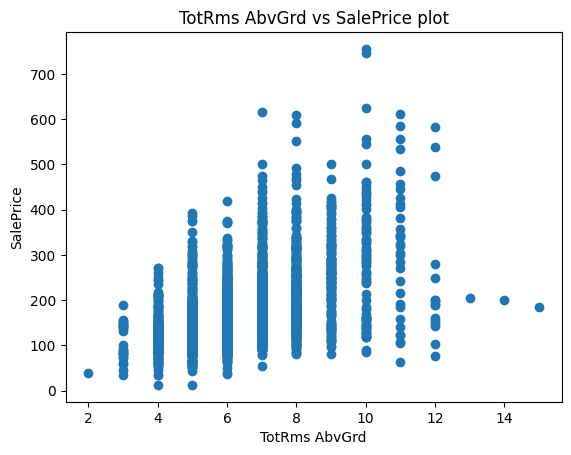

In [9]:
# TODO
plt.scatter(x, y)  # Plot the chart
plt.xlabel('TotRms AbvGrd')
plt.ylabel('SalePrice')
plt.title('TotRms AbvGrd vs SalePrice plot')
plt.show()  # display

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [10]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x,
    The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
    """
    x_mean = np.mean(x)
    x_var = np.var(x)

    y_mean = np.mean(y)  # Changed from x to y
    y_var = np.var(y)    # Changed from x to y

    x_y_cov = np.cov(x, y)[0][1]  # Get the covariance between x and y

    beta1 = x_y_cov / x_var
    beta0 = y_mean - (beta1 * x_mean)

    # Calculate predicted y values
    y_pred = beta0 + beta1 * x

    # Calculate Squared Error (SE)
    min_loss = np.sum((y - y_pred)**2)

    return beta0, beta1, min_loss

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [11]:
# TODO

beta0, beta1, loss = fit_linear(x,y)

print('beta0={}, beta1={}, loss={}'.format(beta0, beta1, loss))

beta0=18.725309558716788, beta1=25.15766592177641, loss=14101635.463290364


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

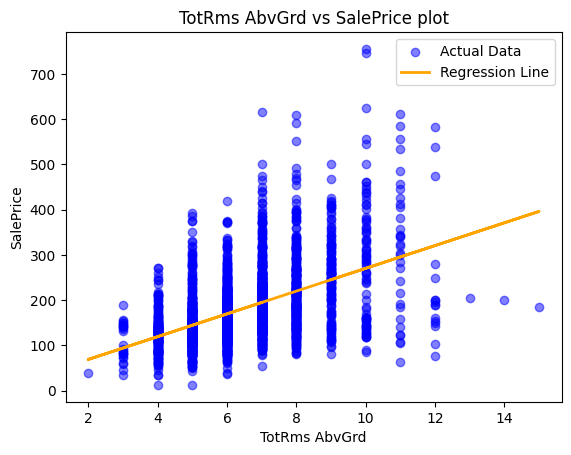

In [12]:
# TODO

y_pred = beta0 + beta1 * x

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.5, label='Actual Data')

# Plot the regression line
plt.plot(x, y_pred, color='orange', linewidth=2, label='Regression Line')

# Set labels and title
plt.xlabel('TotRms AbvGrd')
plt.ylabel('SalePrice')
plt.title('TotRms AbvGrd vs SalePrice plot')

# Add a legend
plt.legend()

# Display the plot
plt.show()


# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. Your table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    Lot Area           XXXXX
    Overall Qual       XXXXX
    Overall Cond       XXXXX
    ...         ...

You will need to write a loop to perform this task.

What variable does the best job predicting house price?

In [13]:
# TODO

y = df['SalePrice'].to_numpy()


results = []
for column in df.columns:
    _, _, loss = fit_linear(df[column], y)
    results.append((column, loss))

# Sort results by loss in ascending order
results.sort(key=lambda x: x[1])

# Find the maximum length of column names for formatting
max_col_length = max(len(col) for col, _ in results)

# Print each row without a header, aligning the loss values
for column, loss in results:
    print(f"{column:<{max_col_length}}    {loss:,.6f}")



SalePrice        2.180525
Gr Liv Area      9,349,293.802773
Garage Cars      10,843,474.184744
Garage Area      11,022,825.938439
Total Bsmt SF    11,213,378.681157
1st Flr SF       11,463,539.300831
Year Built       12,857,598.200844
Full Bath        13,120,703.139682
TotRms AbvGrd    14,101,635.463290
Fireplaces       14,478,395.616363
Half Bath        17,166,315.330950
2nd Flr SF       17,325,635.529899
Lot Area         17,355,552.283717
Bsmt Unf SF      18,057,043.425545
Bedroom AbvGr    18,296,281.087210


**TODO:** Describe in words the meaning of the most predictive variable for housing price.


**Answer:** Here the most predictive variable would be 'Gr Liv Area' which most likely is the Ground Floor Living Area.

# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

Your code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if you did not know these formulas, you could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$.

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,.1)` and $\beta_1$ is in `np.arange(-1,1,.005)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

In [21]:
def fit_approx(x,y,r=10, beta0_step=0.1, beta1_step=0.005):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the sum-of-squares loss. The min_loss returned is the lost of the best beta0 and beta1 you found.
    """
    # TODO complete the following code
    beta0_arr = np.arange(-r, r, beta0_step)
    beta1_arr = np.arange(-1, 1, beta1_step)

    min_loss = float('inf')
    best_beta0 = 0
    best_beta1 = 0

    for beta0 in beta0_arr:
        for beta1 in beta1_arr:
            y_pred = beta0 + beta1 * x
            loss = np.sum((y - y_pred) ** 2)

            if loss < min_loss:
                min_loss = loss
                best_beta0 = beta0
                best_beta1 = beta1

    return best_beta0, best_beta1, min_loss

Compare the output of `fit_approx` and `fit_linear` with `y` being `SalePrice` and `x` being the `Gr Liv Area` variable from our dataset. You should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

We will now compare the approximate fit with linear fit for x being 'Gr Liv Area'.

The quantitative difference is explored below:

In [34]:
x = df['Gr Liv Area'].to_numpy()
y = df['SalePrice'].to_numpy()

linear_beta0, linear_beta1, linear_min_loss = fit_linear(x,y)
approx_beta0, approx_beta1, approx_min_loss = fit_approx(x,y,200,1)

print('linear_beta0={}, linear_beta1={}, linear_min_loss={}'.format(linear_beta0, linear_beta1, linear_min_loss))
print('approx_beta0={}, approx_beta1={}, approx_min_loss={}'.format(approx_beta0, approx_beta1, approx_min_loss))


linear_beta0=13.264676121218258, linear_beta1=0.11173362459794953, linear_min_loss=9349293.80277267
approx_beta0=16, approx_beta1=0.11000000000000099, approx_min_loss=9351496.488712998


visual difference is explored below:

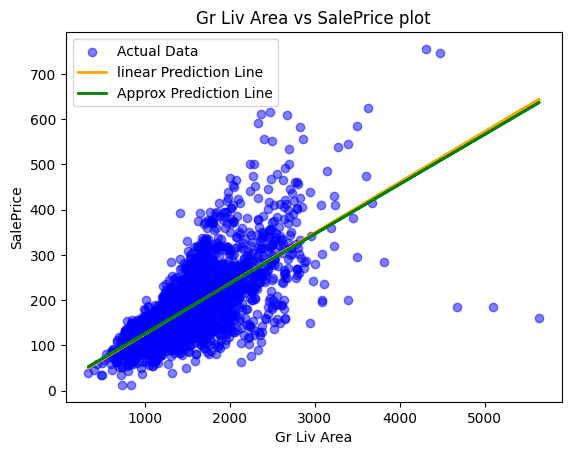

In [35]:
y_pred_linear = linear_beta0 + linear_beta1 * x
y_pred_approx = approx_beta0 + approx_beta1 * x

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.5, label='Actual Data')

# Plot the regression line
plt.plot(x, y_pred_linear, color='orange', linewidth=2, label='linear Prediction Line')
plt.plot(x, y_pred_approx, color='green', linewidth=2, label='Approx Prediction Line')

# Set labels and title
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.title('Gr Liv Area vs SalePrice plot')

# Add a legend
plt.legend()

# Display the plot
plt.show()

## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [36]:
def fit_approx_l1(x,y,r=10, beta0_step=0.1, beta1_step=0.005):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the least absolute deviations loss.
    """
    # TODO complete the following code
    beta0_arr = np.arange(-r, r, beta0_step)
    beta1_arr = np.arange(-1, 1, beta1_step)

    min_loss = float('inf')
    best_beta0 = 0
    best_beta1 = 0

    for beta0 in beta0_arr:
        for beta1 in beta1_arr:
            y_pred = beta0 + beta1 * x
            loss = np.sum(np.absolute((y - y_pred)))

            if loss < min_loss:
                min_loss = loss
                best_beta0 = beta0
                best_beta1 = beta1

    return best_beta0, best_beta1, min_loss

In [37]:
def fit_approx_max(x,y,r=10, beta0_step=0.1, beta1_step=0.005):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the max loss.
    """
    # TODO complete the following code
    beta0_arr = np.arange(-r, r, beta0_step)
    beta1_arr = np.arange(-1, 1, beta1_step)

    min_loss = float('inf')
    best_beta0 = 0
    best_beta1 = 0

    for beta0 in beta0_arr:
        for beta1 in beta1_arr:
            y_pred = beta0 + beta1 * x
            loss = np.max(np.abs(y - y_pred))

            if loss < min_loss:
                min_loss = loss
                best_beta0 = beta0
                best_beta1 = beta1

    return best_beta0, best_beta1, min_loss

**TODO:** Use your algorithm to obtain 3 different linear fits for `SalePrice` with predictor variable `Gr Liv Area`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) on a single figure and use a legend to indicate which fit corresponds to which loss.

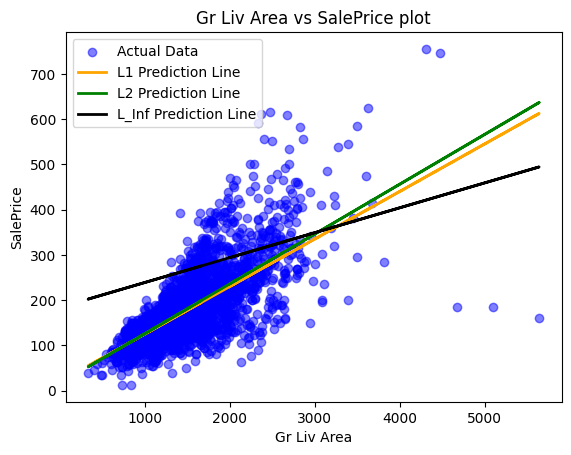

In [38]:
l2_beta0, l2_beta1, _ = fit_approx(x,y,200,1)
l1_beta0, l1_beta1, _ = fit_approx_l1(x,y,200,1)
l_inf_beta0, l_inf_beta1, _ = fit_approx_max(x,y,200,1)



y_pred_l1 = l1_beta0 + l1_beta1 * x
y_pred_l2 = l2_beta0 + l2_beta1 * x
y_pred_l_inf = l_inf_beta0 + l_inf_beta1 * x

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.5, label='Actual Data')

# Plot the regression line
plt.plot(x, y_pred_l1, color='orange', linewidth=2, label='L1 Prediction Line')
plt.plot(x, y_pred_l2, color='green', linewidth=2, label='L2 Prediction Line')
plt.plot(x, y_pred_l_inf, color='black', linewidth=2, label='L_Inf Prediction Line')

# Set labels and title
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.title('Gr Liv Area vs SalePrice plot')

# Add a legend
plt.legend()

# Display the plot
plt.show()



**TODO:** Repeat the process above for the `Lot Area` predictor variable, which has some more extreme outliers. Note that  this variable has a different scale than `Gr Liv Area` so you might need to adjust your approximate fit functions accordingly.

Again produce a plot that contains three different linear fits for all three different loss functions. Write 1-2 sentences of discussion about how the choice of loss function effected the fit.

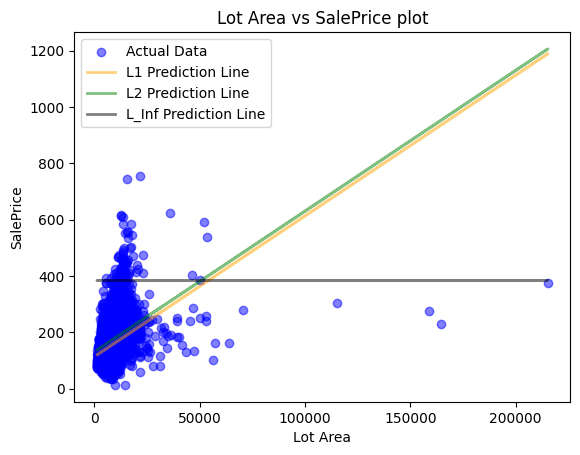

In [39]:
y = df['SalePrice'].to_numpy()
x = df['Lot Area'].to_numpy()

# Experiment with range to find the best values for y-intercept.
l2_beta0, l2_beta1, _ = fit_approx(x,y,500,1)
l1_beta0, l1_beta1, _ = fit_approx_l1(x,y,500,1)
l_inf_beta0, l_inf_beta1, _ = fit_approx_max(x,y,500,1)



y_pred_l1 = l1_beta0 + l1_beta1 * x
y_pred_l2 = l2_beta0 + l2_beta1 * x
y_pred_l_inf = l_inf_beta0 + l_inf_beta1 * x

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.5, label='Actual Data')

# Plot the regression line
plt.plot(x, y_pred_l1, color='orange', alpha=0.5, linewidth=2, label='L1 Prediction Line')
plt.plot(x, y_pred_l2, color='green', alpha=0.5, linewidth=2, label='L2 Prediction Line')
plt.plot(x, y_pred_l_inf, color='black', alpha=0.5, linewidth=2, label='L_Inf Prediction Line')

# Set labels and title
plt.xlabel('Lot Area')
plt.ylabel('SalePrice')
plt.title('Lot Area vs SalePrice plot')

# Add a legend
plt.legend()

# Display the plot
plt.show()

**Explanation**

After experimenting with y-intercepts, a smaller range seems to give better fitting prediction lines. The obesrvaation however for the three loss functions is interesting:

- L1 loss: The prediction line is least affected by the outliers. This can be attributed to all loss being to power of 1.

- L2 loss: Still is greatly affected by the outlier. This can be attributed to all loss being to power of 2.

- L max loss: the loss function is most affected by the outlier (outlier has maximum influence over the loss value) and gives a poor linear fit. This can be attributed to all loss being equal to max loss.


